# Google Books  Project

This is a project reviewing this [Kaggle dataset](https://www.kaggle.com/datasets/bilalyussef/google-books-dataset) over Google books.  All acknowledgements go to Bilal Yussef for compiling this dataset and to Google for providing the data.   

For this project, the following are some key insights I want to look into:

1. Most prominent language in this dataset
2. Average/Max/Min page counts, ratings, and prices
3. Most popular genre
4. Top 10 rated authors
5. Top 10 rated books
6. Top 10 publishers (by number of books published)
7. Top 10 most published authors

##  Import and Data Cleaning

To start this project, I want to import the necessary modules and dataset:

In [1]:
import numpy as np
import pandas as pd

books_df = pd.read_csv('raw_data/google_books_1299.csv')

Next, I want to get a glimpse of the data using head and info:

In [2]:
books_df.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78161E+12,English,31-Jul-14
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78076E+12,English,1-Jul-07
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78151E+12,English,5-Nov-19
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78162E+12,English,1-Mar-09
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78001E+12,English,8-Jan-09


In [3]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1299 non-null   int64  
 1   title           1299 non-null   object 
 2   author          1299 non-null   object 
 3   rating          1224 non-null   float64
 4   voters          1224 non-null   object 
 5   price           1299 non-null   float64
 6   currency        1299 non-null   object 
 7   description     1296 non-null   object 
 8   publisher       1299 non-null   object 
 9   page_count      1299 non-null   float64
 10  generes         1299 non-null   object 
 11  ISBN            1299 non-null   object 
 12  language        1299 non-null   object 
 13  published_date  1299 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 142.2+ KB


I see that the column 'Unnamed: 0' is just a repeat of the index, so this I will most likely delete later.  

Next, I want to view the datatypes in my dataframe:

In [4]:
books_df.dtypes

Unnamed: 0          int64
title              object
author             object
rating            float64
voters             object
price             float64
currency           object
description        object
publisher          object
page_count        float64
generes            object
ISBN               object
language           object
published_date     object
dtype: object

For now, I will keep the data types as they are.  

Next, I want to check for null values:

In [5]:
books_df.isnull().sum()

Unnamed: 0         0
title              0
author             0
rating            75
voters            75
price              0
currency           0
description        3
publisher          0
page_count         0
generes            0
ISBN               0
language           0
published_date     0
dtype: int64

Ratings and Voters have 75 null values each.  For now, I will keep this and will most likely fill in these values later.  

Next, I want to check the column names:

In [6]:
books_df.columns

Index(['Unnamed: 0', 'title', 'author', 'rating', 'voters', 'price',
       'currency', 'description', 'publisher', 'page_count', 'generes', 'ISBN',
       'language', 'published_date'],
      dtype='object')

I see there is a spelling error for "generes", so I rename is column to "genres"

In [7]:
books_df = books_df.rename(columns={'generes': 'genres'})

In [8]:
books_df.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,genres,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78161E+12,English,31-Jul-14
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78076E+12,English,1-Jul-07
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78151E+12,English,5-Nov-19
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78162E+12,English,1-Mar-09
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78001E+12,English,8-Jan-09


Next, I delete the 'Unnamed: 0' column as well:

In [9]:
books_df = books_df.drop(columns='Unnamed: 0')

In [10]:
books_df

,title,author,rating,voters,price,currency,description,publisher,page_count,genres,ISBN,language,published_date
0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192.0,none,9.78161E+12,English,31-Jul-14
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78076E+12,English,1-Jul-07
2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78151E+12,English,5-Nov-19
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320.0,none,9.78162E+12,English,1-Mar-09
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78001E+12,English,8-Jan-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,A short gift book of festive hospital diaries ...,Pan Macmillan,112.0,"Medical , Health Care Delivery",9.78153E+12,English,17-Oct-19
1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,46.85,SAR,'Astonishing ... an amazing book ... absolutel...,Penguin UK,368.0,"Psychology , Cognitive Psychology &amp, Cognition",9.78014E+12,English,28-Sep-17
1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,46.85,SAR,The modern marketplace is increasingly unpredi...,Kogan Page Publishers,176.0,none,9.78075E+12,English,3-Apr-10
1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,43.28,SAR,"Collects Web of Spider-Man #31-32, Amazing Spi...",Marvel Entertainment,168.0,none,9.7813E+12,English,10-Dec-14


Next, I am going to delete the column 'Description' as it has no relevance to my analysis:

In [11]:
books_df = books_df.drop(['description'], axis=1)

In [12]:
books_df

,title,author,rating,voters,price,currency,publisher,page_count,genres,ISBN,language,published_date
0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,Kodansha Comics,192.0,none,9.78161E+12,English,31-Jul-14
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78076E+12,English,1-Jul-07
2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78151E+12,English,5-Nov-19
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,Kensington Publishing Corp.,320.0,none,9.78162E+12,English,1-Mar-09
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78001E+12,English,8-Jan-09
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,41.82,SAR,Pan Macmillan,112.0,"Medical , Health Care Delivery",9.78153E+12,English,17-Oct-19
1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,46.85,SAR,Penguin UK,368.0,"Psychology , Cognitive Psychology &amp, Cognition",9.78014E+12,English,28-Sep-17
1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,46.85,SAR,Kogan Page Publishers,176.0,none,9.78075E+12,English,3-Apr-10
1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,43.28,SAR,Marvel Entertainment,168.0,none,9.7813E+12,English,10-Dec-14


Next, I want to check the unique values in currency:

In [13]:
books_df['currency'].unique()

array(['SAR', 'Free'], dtype=object)

The Saudi Riyal is the only currency.  I am wanting this in US Dollars and the current exchange rate as of writing this is 1 SAR = $0.27.  I will multiply the values in the price columns by .27 to get the approximate price US dollars:

In [14]:
books_df['price'] = books_df['price']*.27

In [15]:
books_df

,title,author,rating,voters,price,currency,publisher,page_count,genres,ISBN,language,published_date
0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,11.6856,SAR,Kodansha Comics,192.0,none,9.78161E+12,English,31-Jul-14
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,7.0605,SAR,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78076E+12,English,1-Jul-07
2,The Art of Super Mario Odyssey,Nintendo,3.9,9,36.1395,SAR,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78151E+12,English,5-Nov-19
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,7.0605,SAR,Kensington Publishing Corp.,320.0,none,9.78162E+12,English,1-Mar-09
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,7.7058,SAR,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78001E+12,English,8-Jan-09
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,11.2914,SAR,Pan Macmillan,112.0,"Medical , Health Care Delivery",9.78153E+12,English,17-Oct-19
1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,12.6495,SAR,Penguin UK,368.0,"Psychology , Cognitive Psychology &amp, Cognition",9.78014E+12,English,28-Sep-17
1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,12.6495,SAR,Kogan Page Publishers,176.0,none,9.78075E+12,English,3-Apr-10
1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,11.6856,SAR,Marvel Entertainment,168.0,none,9.7813E+12,English,10-Dec-14


I will then remove the currency column and rename the 'price' column to 'price_usd':

In [16]:
books_df = books_df.drop(columns='currency')

In [17]:
books_df = books_df.rename(columns = {'price':'price_usd'})

I then set the column to round to 2 decimal places

In [18]:
books_df['price_usd'] = books_df['price_usd'].round(2)

books_df

,title,author,rating,voters,price_usd,publisher,page_count,genres,ISBN,language,published_date
0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,11.69,Kodansha Comics,192.0,none,9.78161E+12,English,31-Jul-14
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,7.06,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78076E+12,English,1-Jul-07
2,The Art of Super Mario Odyssey,Nintendo,3.9,9,36.14,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78151E+12,English,5-Nov-19
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,7.06,Kensington Publishing Corp.,320.0,none,9.78162E+12,English,1-Mar-09
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,7.71,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78001E+12,English,8-Jan-09
...,...,...,...,...,...,...,...,...,...,...,...
1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,11.29,Pan Macmillan,112.0,"Medical , Health Care Delivery",9.78153E+12,English,17-Oct-19
1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,12.65,Penguin UK,368.0,"Psychology , Cognitive Psychology &amp, Cognition",9.78014E+12,English,28-Sep-17
1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,12.65,Kogan Page Publishers,176.0,none,9.78075E+12,English,3-Apr-10
1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,11.69,Marvel Entertainment,168.0,none,9.7813E+12,English,10-Dec-14


Next, I want to change the 'published_date' column format to datetime:

In [19]:
books_df['published_date'] = pd.to_datetime(books_df['published_date'], errors='coerce')

In [20]:
books_df

,title,author,rating,voters,price_usd,publisher,page_count,genres,ISBN,language,published_date
0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,11.69,Kodansha Comics,192.0,none,9.78161E+12,English,2014-07-31
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,7.06,Kensington Publishing Corp.,288.0,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9.78076E+12,English,2007-07-01
2,The Art of Super Mario Odyssey,Nintendo,3.9,9,36.14,Dark Horse Comics,368.0,"Games &amp, Activities , Video &amp, Electronic",9.78151E+12,English,2019-11-05
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,7.06,Kensington Publishing Corp.,320.0,none,9.78162E+12,English,2009-03-01
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,7.71,HarperCollins UK,544.0,"Fiction , Fantasy , Dark Fantasy",9.78001E+12,English,2009-01-08
...,...,...,...,...,...,...,...,...,...,...,...
1294,Twas The Nightshift Before Christmas: Festive ...,Adam Kay,4.7,47,11.29,Pan Macmillan,112.0,"Medical , Health Care Delivery",9.78153E+12,English,2019-10-17
1295,Why We Sleep: The New Science of Sleep and Dreams,Matthew Walker,4.8,52,12.65,Penguin UK,368.0,"Psychology , Cognitive Psychology &amp, Cognition",9.78014E+12,English,2017-09-28
1296,How to Understand Business Finance: Edition 2,Bob Cinnamon,3.5,4,12.65,Kogan Page Publishers,176.0,none,9.78075E+12,English,2010-04-03
1297,Spider-Man: Kraven's Last Hunt,J. M. DeMatteis,4.6,74,11.69,Marvel Entertainment,168.0,none,9.7813E+12,English,2014-12-10


Next, I want to find the genres for each book as well as a value count for each genre:

In [21]:
for genre in books_df['genres']:
    print(genre)

none
Fiction , Mystery &amp, Detective , Cozy , General
Games &amp, Activities , Video &amp, Electronic
none
Fiction , Fantasy , Dark Fantasy
none
Fiction , Media Tie-In
Fiction , Fantasy , Epic
Games &amp, Activities , Video &amp, Electronic
Biography &amp, Autobiography , Medical (incl. Patients)
Fiction , Fantasy , Dragons &amp, Mythical Creatures
none
none
Comics &amp, Graphic Novels , Superheroes
none
Fiction , Fantasy , Epic
Comics & Graphic Novels , Fantasy
none
Biography &amp, Autobiography , Sports
Fiction , Fantasy , Military
Comics & Graphic Novels , Science Fiction
none
Fiction , Women
none
Juvenile Fiction , Humorous Stories
Fiction , Classics
Business &amp, Economics , Motivational
none
Social Science , General
Fiction , Science Fiction , Action &amp, Adventure
none
Fiction , Mystery &amp, Detective , General
Business &amp, Economics , Motivational
none
Fiction , Mystery &amp, Detective , Women Sleuths
Fiction , Noir
Fiction , Science Fiction , Action &amp, Adventure
none

In [22]:
books_df['genres'].value_counts()

none                                                        527
Fiction , Thrillers , Suspense                               35
Fiction , Fantasy , Epic                                     33
Comics &amp, Graphic Novels , Superheroes                    30
Fiction , Mystery &amp, Detective , General                  21
                                                           ... 
Biography &amp, Autobiography , Science &amp, Technology      1
Political Science , Public Affairs &amp, Administration       1
Cooking , Holiday                                             1
Social Science , Popular Culture                              1
Medical , Health Care Delivery                                1
Name: genres, Length: 242, dtype: int64

With nearly half of the books reporting "none" as their genre, finding any meaningful analysis based on genre will be difficult.  Because of this, I will drop this column for this analysis:

In [23]:
books_df = books_df.drop(columns='genres')

Next, I will fill in null ratings with the mean rating:

In [24]:
books_df['rating'].fillna(books_df['rating'].mean(), inplace=True)

In [25]:
books_df.isnull().sum()

title              0
author             0
rating             0
voters            75
price_usd          0
publisher          0
page_count         0
ISBN               0
language           0
published_date     2
dtype: int64

Finally, I want to check the unique values and value counts of the language column:

In [26]:
print(books_df['language'].unique())
print(books_df['language'].value_counts())

['English']
English    1299
Name: language, dtype: int64


This answers my first question I find, which was "what is the most prominent language in this dataset?"  All of these books were published in English.  

While voters had 75 null values, this column is not needed for this project's analysis, so I will drop this column as well:

In [27]:
books_df = books_df.drop(columns='voters')

Finally, I will remove duplicate records:

In [28]:
books_df = books_df.drop_duplicates()

In [29]:
books_df

,title,author,rating,price_usd,publisher,page_count,ISBN,language,published_date
0,Attack on Titan: Volume 13,Hajime Isayama,4.6,11.69,Kodansha Comics,192.0,9.78161E+12,English,2014-07-31
1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,7.06,Kensington Publishing Corp.,288.0,9.78076E+12,English,2007-07-01
2,The Art of Super Mario Odyssey,Nintendo,3.9,36.14,Dark Horse Comics,368.0,9.78151E+12,English,2019-11-05
3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,7.06,Kensington Publishing Corp.,320.0,9.78162E+12,English,2009-03-01
4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,7.71,HarperCollins UK,544.0,9.78001E+12,English,2009-01-08
...,...,...,...,...,...,...,...,...,...
746,The Complete Art of War,Sun Tzu,4.7,2.12,Simon and Schuster,667.0,9.78163E+12,English,2013-04-29
790,(FREE SAMPLE) CTET English & Hindi Language 9 ...,Disha Experts,4.5,0.00,Disha Publications,23.0,Original pages,English,2019-11-06
847,We,Yevgeny Zamyatin,4.3,1.93,Pan,226.0,9.78174E+12,English,2013-01-15
912,1 Sample Paper for CBSE Class 10 Science 2020 ...,Disha Experts,4.7,0.00,Disha Publications,25.0,Original pages,English,2019-10-21


 With the data sufficiently cleaned, I will now move into my other analyses.

# Analysis

First, I want to find average, min, and max of page counts, ratings, and prices:

In [30]:
print('Page Count stats:', '\n', 
      'Max:', books_df['page_count'].max(), '\n',
     'Min:', books_df['page_count'].min(), '\n',
     'Average:', books_df['page_count'].mean())

Page Count stats: 
 Max: 9781300000000.0 
 Min: 7.0 
 Average: 39600405206.890686


The average and max seem way off, so I want to check which record is causing the issue:

In [31]:
books_df.loc[books_df['page_count'] > 4000]

,title,author,rating,price_usd,publisher,page_count,ISBN,language,published_date
68,A Game of Thrones: The Story Continues Books 1...,George R.R. Martin,4.5,23.78,HarperCollins UK,4.544000e+03,9.78001E+12,English,2012-03-15
288,Deadpool Team-Up Vol. 1: Good Buddies,Fred Van Lente,3.9,11.69,Marvel Entertainment,9.781300e+12,Original pages,English,NaT


Judging by the number in the page count, I think that the ISBN was entered in the page count instead.  I will replace this with the page count as listed by [Google](https://books.google.com/books/about/Deadpool_Team_Up_Vol_1.html?id=EXUlAAAAQBAJ&source=kp_book_description) for this book(186 pages):

In [32]:
books_df.at[288, 'page_count'] = 186

In [33]:
books_df.loc[288]

title             Deadpool Team-Up Vol. 1: Good Buddies
author                                   Fred Van Lente
rating                                              3.9
price_usd                                         11.69
publisher                          Marvel Entertainment
page_count                                        186.0
ISBN                                     Original pages
language                                        English
published_date                                      NaT
Name: 288, dtype: object

Now I will try to find the stats again:

In [55]:
print('Highest Page Count:', round(books_df['page_count'].max()), 
      '\nLowest Page Count:', round(books_df['page_count'].min()),
     '\nAverage Page Count:', round(books_df['page_count'].mean()))
print(' ')
print('Highest Rating:', books_df['rating'].max(),
     '\nLowest Rating:', books_df['rating'].min(),
     '\nAverage Rating:', round(books_df['rating'].mean(), 1))
print(' ')
print('Highest Price:', '$' + str(books_df['price_usd'].max()),
     '\nLowest Price:', '$' + str(books_df['price_usd'].min()),
     '\nAverage Price:', '$' + str(round(books_df['price_usd'].mean(), 2)))

Highest Page Count: 4544 
Lowest Page Count: 7 
Average Page Count: 349
 
Highest Rating: 5.0 
Lowest Rating: 2.5 
Average Rating: 4.4
 
Highest Price: $239.24 
Lowest Price: $0.0 
Average Price: $12.47


Next, I will find the top 10 rated authors and books by average rating:

In [35]:
books_df.groupby(['author'])[['rating']].mean().sort_values(by=['rating'], ascending=False).head(10)

,rating
author,
Nir Eyal,5.0
Gerald Seymour,5.0
Michael Sincere,5.0
Story by FUSE,5.0
Michael E. Porter,5.0
Melville Herman,5.0
Billy Connolly,5.0
Julie Andrews,5.0
Matthew Mercer,5.0


In [36]:
books_df.groupby(['title'])[['rating']].mean().sort_values(by=['rating'], ascending=False).head(10)

,rating
title,
That Time I got Reincarnated as a Slime 11,5.0
Tall Tales and Wee Stories: The Best of Billy Connolly,5.0
Final Option: 'The best one yet',5.0
Battle Sight Zero,5.0
Home Work: A Memoir of My Hollywood Years,5.0
Indistractable: How to Control Your Attention and Choose Your Life,5.0
The Queen of Nothing (The Folk of the Air #3),5.0
No One Is Too Small to Make a Difference,5.0
The Red Signal: An Agatha Christie Short Story,5.0


Now I want to see the top 10 publishers based on most books published:

<AxesSubplot:>

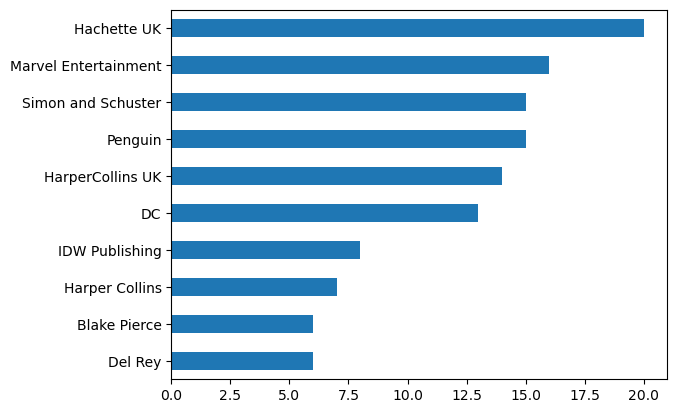

In [53]:
top10pub = books_df['publisher'].value_counts().nlargest(10)

top10pub.sort_values(ascending=True).plot(kind='barh', legend=False)

And finally, top 10 most published authors:

<AxesSubplot:>

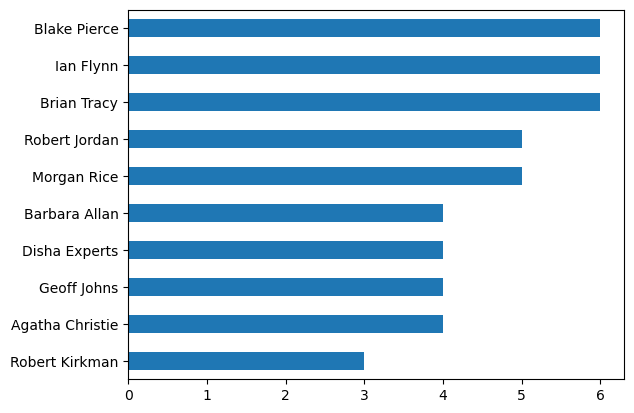

In [52]:
top10pubauth = books_df['author'].value_counts().nlargest(10)

top10pubauth.sort_values(ascending=True).plot(kind='barh', legend=False)

## Conclusion

Thanks for reading!  This is my first python notebook, so comments and suggestions for improvement are always welcome!